In [1]:
import pandas as pd
import numpy as np

In [2]:
f = pd.read_csv('children_per_woman_total_fertility.csv')

In [3]:
f

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Aruba,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,...,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.83,1.83
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
2,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
4,Netherlands Antilles,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,...,2.00,2.00,2.01,2.01,2.01,2.01,2.01,2.02,2.02,2.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Samoa,6.98,6.98,6.98,6.98,6.98,6.98,6.98,6.98,6.98,...,2.10,2.09,2.08,2.07,2.06,2.05,2.04,2.03,2.02,2.02
198,Yemen,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,...,1.68,1.68,1.69,1.69,1.69,1.69,1.70,1.70,1.70,1.70
199,South Africa,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,...,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80
200,Zambia,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,...,2.59,2.57,2.56,2.54,2.53,2.51,2.50,2.48,2.46,2.46


In [4]:
# melt - Define one or more columns to be left as is as identifiers (id_vars)
# Drag all the other columns into the row axis. 
# 2 non identifier columns are added. 1) Variable - indicates a variable for which value is added into 2) Value column. 

In [5]:
f = f.melt(id_vars=['country'], var_name = 'year', value_name = 'fertility')
f

,country,year,fertility
0,Aruba,1799,5.64
1,Afghanistan,1799,7.00
2,Angola,1799,6.93
3,Albania,1799,4.60
4,Netherlands Antilles,1799,5.80
...,...,...,...
60797,Samoa,2099,2.02
60798,Yemen,2099,1.70
60799,South Africa,2099,1.80
60800,Zambia,2099,2.46


In [6]:
f.dtypes # year data is string data, change it

country       object
year          object
fertility    float64
dtype: object

In [7]:
f.year = f.year.astype('int')

In [8]:
f.dtypes

country       object
year           int32
fertility    float64
dtype: object

In [9]:
%ls

 Volume in drive D is New Volume
 Volume Serial Number is EA74-D187

 Directory of D:\Important Docs\Knowledge Hut\Machine Learning\Prism\Advanced Data Analytics

03-11-2022  15:19    <DIR>          .
30-10-2022  12:32    <DIR>          ..
30-10-2022  23:18    <DIR>          .ipynb_checkpoints
30-10-2022  23:37           347,140 Advanced Data Analytics.ipynb
03-11-2022  15:19           153,477 Advanced Data Analytics-2(Locators and indexing).ipynb
26-10-2022  21:21           256,139 child_mortality_0_5_year_olds_dying_per_1000_born.csv
26-10-2022  21:21           298,207 children_per_woman_total_fertility.csv
26-10-2022  21:21           273,513 life_expectancy_years.csv
26-10-2022  21:21           335,548 population_total.csv
               6 File(s)      1,664,024 bytes
               3 Dir(s)  121,651,728,384 bytes free


In [10]:
gap_vars = 'children_per_woman_total_fertility child_mortality_0_5_year_olds_dying_per_1000_born population_total life_expectancy_years'.split()
dfs = []
for gap_var in gap_vars:
    df = pd.read_csv(f'{gap_var}.csv')
    df = df.melt(id_vars = ['country'], var_name = 'year', value_name = gap_var)
    df.year = df.year.astype('int')
    dfs.append(df)

In [11]:
dfs

[                    country  year  children_per_woman_total_fertility
 0                     Aruba  1799                                5.64
 1               Afghanistan  1799                                7.00
 2                    Angola  1799                                6.93
 3                   Albania  1799                                4.60
 4      Netherlands Antilles  1799                                5.80
 ...                     ...   ...                                 ...
 60797                 Samoa  2099                                2.02
 60798                 Yemen  2099                                1.70
 60799          South Africa  2099                                1.80
 60800                Zambia  2099                                2.46
 60801              Zimbabwe  2099                                1.83
 
 [60802 rows x 3 columns],
                     country  year  \
 0               Afghanistan  1799   
 1                    Angola  1799   
 2   

In [12]:
from IPython.display import display
display(*dfs)

,country,year,children_per_woman_total_fertility
0,Aruba,1799,5.64
1,Afghanistan,1799,7.00
2,Angola,1799,6.93
3,Albania,1799,4.60
4,Netherlands Antilles,1799,5.80
...,...,...,...
60797,Samoa,2099,2.02
60798,Yemen,2099,1.70
60799,South Africa,2099,1.80
60800,Zambia,2099,2.46


,country,year,child_mortality_0_5_year_olds_dying_per_1000_born
0,Afghanistan,1799,469.00
1,Angola,1799,486.00
2,Albania,1799,375.00
3,Andorra,1799,NaN
4,United Arab Emirates,1799,434.00
...,...,...,...
59292,Samoa,2099,3.51
59293,Yemen,2099,12.60
59294,South Africa,2099,9.42
59295,Zambia,2099,11.40


,country,year,population_total
0,Afghanistan,1799,3.28M
1,Angola,1799,1.57M
2,Albania,1799,400k
3,Andorra,1799,2650
4,United Arab Emirates,1799,40.2k
...,...,...,...
59292,Samoa,2099,310k
59293,Yemen,2099,53.2M
59294,South Africa,2099,79.2M
59295,Zambia,2099,81.5M


,country,year,life_expectancy_years
0,Afghanistan,1799,28.2
1,Angola,1799,27.0
2,Albania,1799,35.4
3,Andorra,1799,NaN
4,United Arab Emirates,1799,30.7
...,...,...,...
58690,Samoa,2099,80.8
58691,Yemen,2099,78.0
58692,South Africa,2099,77.7
58693,Zambia,2099,77.1


In [13]:
dfs[0].isna().sum()

country                                0
year                                   0
children_per_woman_total_fertility    87
dtype: int64

In [14]:
for var, df in zip(gap_vars, dfs):
    print(var, len(df), df.isna().sum().sum(), sep = '\t')

children_per_woman_total_fertility	60802	87
child_mortality_0_5_year_olds_dying_per_1000_born	59297	1800
population_total	59297	0
life_expectancy_years	58695	2079


# combining data frames

In [15]:
# 1. Concat (column wise, row wise)
# 2. Join
# 3. merge

In [16]:
x1 = pd.DataFrame({'alpha':list('abcde'), 'num':np.arange(5), 'x':np.arange(0,500,100)})

In [17]:
x1

,alpha,num,x
0,a,0,0
1,b,1,100
2,c,2,200
3,d,3,300
4,e,4,400


In [18]:
x2 = pd.DataFrame({'alpha':list('defgh'), 'num':np.arange(3,8), 'x':np.arange(0,100,20)})

In [19]:
x2

,alpha,num,x
0,d,3,0
1,e,4,20
2,f,5,40
3,g,6,60
4,h,7,80


In [20]:
y = pd.DataFrame({'alpha':list('abcde'), 'num':np.arange(5), 'y':np.arange(0,50,10)})

In [21]:
y

,alpha,num,y
0,a,0,0
1,b,1,10
2,c,2,20
3,d,3,30
4,e,4,40


In [22]:
# row wise concat
# cols needs to be the same, common rows would get duplicated. 
pd.concat([x1,x2])

,alpha,num,x
0,a,0,0
1,b,1,100
2,c,2,200
3,d,3,300
4,e,4,400
0,d,3,0
1,e,4,20
2,f,5,40
3,g,6,60
4,h,7,80


In [23]:
# col wise concat
# we need rows and indexes to match, if not joining needs to be done. Final df will be wider
pd.concat([x1,y], axis=1)


,alpha,num,x,alpha,num,y
0,a,0,0,a,0,0
1,b,1,100,b,1,10
2,c,2,200,c,2,20
3,d,3,300,d,3,30
4,e,4,400,e,4,40


In [24]:
# problem : repeated cols
# sols : set common cols as indexes before concat
common = ['alpha', 'num']
x1.set_index(common, inplace=True)
x2.set_index(common, inplace=True)
x1

,,x
alpha,num,
a,0,0
b,1,100
c,2,200
d,3,300
e,4,400


In [25]:
y.set_index(common, inplace=True)

In [26]:
y

,,y
alpha,num,
a,0,0
b,1,10
c,2,20
d,3,30
e,4,40


In [27]:
pd.concat([x1,y], axis=1)

,,x,y
alpha,num,,
a,0,0,0
b,1,100,10
c,2,200,20
d,3,300,30
e,4,400,40


In [28]:
# Join
# concept of combining rows from two or more tables, based on related columns between them
# most generic of combining tabular data. 
# computaionally intensive and should be avoided if possible

In [29]:
# join : Combine two dataframes based on common indexes
# merge : similar to join but works on common columns by default
# Join and merge can be made same by using two key words arguments (left_index, right_index args give same effect as join())


In [30]:
x1.join(y)

,,x,y
alpha,num,,
a,0,0,0
b,1,100,10
c,2,200,20
d,3,300,30
e,4,400,40


In [31]:
x1.merge(y, left_index=True, right_index= True)

,,x,y
alpha,num,,
a,0,0,0
b,1,100,10
c,2,200,20
d,3,300,30
e,4,400,40


In [32]:
x1.reset_index().merge(y.reset_index())

,alpha,num,x,y
0,a,0,0,0
1,b,1,100,10
2,c,2,200,20
3,d,3,300,30
4,e,4,400,40


In [33]:
x2.join(y, how='outer')

,,x,y
alpha,num,,
a,0,NaN,0.0
b,1,NaN,10.0
c,2,NaN,20.0
d,3,0.0,30.0
e,4,20.0,40.0
f,5,40.0,NaN
g,6,60.0,NaN
h,7,80.0,NaN


In [34]:
# conclusions on gapminder datasets
# 1. Sizes do not match
# 2. NaN's would result
# 3. Decisions: left, right, outer?


In [35]:
common = ['country', 'year']
for df in dfs:
    df.set_index(common, inplace=True)

In [36]:
from functools import reduce
#The reduce(fun,seq) function is used to apply a particular function passed in its 
# argument to all of the list elements mentioned in the sequence passed along.This function is defined in “functools” module.
g = gapminder = reduce(lambda x,y: x.join(y), dfs)
gapminder

,,children_per_woman_total_fertility,child_mortality_0_5_year_olds_dying_per_1000_born,population_total,life_expectancy_years
country,year,,,,
Aruba,1799,5.64,NaN,NaN,NaN
Afghanistan,1799,7.00,469.00,3.28M,28.2
Angola,1799,6.93,486.00,1.57M,27.0
Albania,1799,4.60,375.00,400k,35.4
Netherlands Antilles,1799,5.80,NaN,NaN,NaN
...,...,...,...,...,...
Samoa,2099,2.02,3.51,310k,80.8
Yemen,2099,1.70,12.60,53.2M,78.0
South Africa,2099,1.80,9.42,79.2M,77.7


In [37]:
gapminder.rename(columns = {'children_per_woman_total_fertility':'fertility', 'child_mortality_0_5_year_olds_dying_per_1000_born':'infant_mortality', 'population_total':'population', 'life_expectancy_years':'life_expectancy' })

,,fertility,infant_mortality,population,life_expectancy
country,year,,,,
Aruba,1799,5.64,NaN,NaN,NaN
Afghanistan,1799,7.00,469.00,3.28M,28.2
Angola,1799,6.93,486.00,1.57M,27.0
Albania,1799,4.60,375.00,400k,35.4
Netherlands Antilles,1799,5.80,NaN,NaN,NaN
...,...,...,...,...,...
Samoa,2099,2.02,3.51,310k,80.8
Yemen,2099,1.70,12.60,53.2M,78.0
South Africa,2099,1.80,9.42,79.2M,77.7


In [38]:
gcat = pd.concat(dfs, axis =1)
gcat

children_per_woman_total_fertility  \
country     year                                       
Afghanistan 1799                                7.00   
            1800                                7.00   
            1801                                7.00   
            1802                                7.00   
            1803                                7.00   
...                                              ...   
Zimbabwe    2095                                1.84   
            2096                                1.83   
            2097                                1.83   
            2098                                1.83   
            2099                                1.83   

                  child_mortality_0_5_year_olds_dying_per_1000_born  \
country     year                                                      
Afghanistan 1799                                              469.0   
            1800                                              469.0   
            1801                                              469.0   
            1802                                              469.0   
            1803                                              469.0   
...                                                             ...   
Zimbabwe    2095                                               14.1   
            2096                                               13.9   
            2097                                               13.8   
            2098                                               13.7   
            2099                                               13.7   

                 population_total  life_expectancy_years  
country     year                                          
Afghanistan 1799            3.28M                   28.2  
            1800            3.28M                   28.2  
            1801            3.28M                   28.2  
            1802            3.28M                   28.2  
            1803            3.28M                   28.2  
...                           ...                    ...  
Zimbabwe    2095            30.9M                   73.9  
            2096              31M                   74.0  
            2097              31M                   74.2  
            2098              31M                   74.3  
            2099              31M                   74.4  

[64113 rows x 4 columns]

In [39]:
gcat.rename(columns = {'children_per_woman_total_fertility':'fertility', 'child_mortality_0_5_year_olds_dying_per_1000_born':'infant_mortality', 'population_total':'population', 'life_expectancy_years':'life_expectancy' })

fertility  infant_mortality population  life_expectancy
country     year                                                         
Afghanistan 1799       7.00             469.0      3.28M             28.2
            1800       7.00             469.0      3.28M             28.2
            1801       7.00             469.0      3.28M             28.2
            1802       7.00             469.0      3.28M             28.2
            1803       7.00             469.0      3.28M             28.2
...                     ...               ...        ...              ...
Zimbabwe    2095       1.84              14.1      30.9M             73.9
            2096       1.83              13.9        31M             74.0
            2097       1.83              13.8        31M             74.2
            2098       1.83              13.7        31M             74.3
            2099       1.83              13.7        31M             74.4

[64113 rows x 4 columns]

In [40]:
g.isna().sum()

children_per_woman_total_fertility                     87
child_mortality_0_5_year_olds_dying_per_1000_born    4966
population_total                                     4816
life_expectancy_years                                4816
dtype: int64

In [41]:
g.rename(columns = {'children_per_woman_total_fertility':'fertility', 'child_mortality_0_5_year_olds_dying_per_1000_born':'infant_mortality', 'population_total':'population', 'life_expectancy_years':'life_expectancy' }, inplace = True)

In [100]:
usa_can = 'United States,Canada'.split(',')
usa_can

['United States', 'Canada']

In [101]:
south_asia = 'Afghanistan,Bangladesh,Bhutan,India,Maldives,Nepal,Pakistan,Sri Lanka'.split(',')
south_asia

['Afghanistan',
 'Bangladesh',
 'Bhutan',
 'India',
 'Maldives',
 'Nepal',
 'Pakistan',
 'Sri Lanka']

In [42]:
south_east_asia = 'Brunei,Cambodia,Indonesia,Lao,Malaysia,Myanmar,Philippines,Singapore,Thailand,Timor-Leste,Vietnam'.split(',')
south_east_asia

['Brunei',
 'Cambodia',
 'Indonesia',
 'Lao',
 'Malaysia',
 'Myanmar',
 'Philippines',
 'Singapore',
 'Thailand',
 'Timor-Leste',
 'Vietnam']

# Indexing and locators

In [43]:
g.sort_index(inplace=True)

In [44]:
g

fertility  infant_mortality population  life_expectancy
country     year                                                         
Afghanistan 1799       7.00             469.0      3.28M             28.2
            1800       7.00             469.0      3.28M             28.2
            1801       7.00             469.0      3.28M             28.2
            1802       7.00             469.0      3.28M             28.2
            1803       7.00             469.0      3.28M             28.2
...                     ...               ...        ...              ...
Zimbabwe    2095       1.84              14.1      30.9M             73.9
            2096       1.83              13.9        31M             74.0
            2097       1.83              13.8        31M             74.2
            2098       1.83              13.7        31M             74.3
            2099       1.83              13.7        31M             74.4

[60802 rows x 4 columns]

In [45]:
g.index.levels

FrozenList([['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', 'Cote d'Ivoire', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hon

In [46]:
g.index.levels[0]

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Virgin Islands (U.S.)', 'Western Sahara', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='country', length=202)

In [47]:
g.index.levels[1]

Int64Index([1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808,
            ...
            2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099],
           dtype='int64', name='year', length=301)

In [48]:
g.columns

Index(['fertility', 'infant_mortality', 'population', 'life_expectancy'], dtype='object')

In [49]:
# What is the development data for Afghanistan or range of countries like afghanistan to austrailia
# what are the dev params for a country like singapore in 2000? or between 2000 and 2020 or only life expectancy
# what is the infant mortality for south east asian countries?


In [50]:
g.loc['Afghanistan']

,fertility,infant_mortality,population,life_expectancy
year,,,,
1799,7.00,469.0,3.28M,28.2
1800,7.00,469.0,3.28M,28.2
1801,7.00,469.0,3.28M,28.2
1802,7.00,469.0,3.28M,28.2
1803,7.00,469.0,3.28M,28.2
...,...,...,...,...
2095,1.74,11.6,75.8M,76.2
2096,1.74,11.5,75.6M,76.4
2097,1.74,11.3,75.4M,76.5


In [51]:
g.loc['Afghanistan':'Australia']

fertility  infant_mortality population  life_expectancy
country     year                                                         
Afghanistan 1799       7.00            469.00      3.28M             28.2
            1800       7.00            469.00      3.28M             28.2
            1801       7.00            469.00      3.28M             28.2
            1802       7.00            469.00      3.28M             28.2
            1803       7.00            469.00      3.28M             28.2
...                     ...               ...        ...              ...
Australia   2095       1.80              0.57      42.1M             91.8
            2096       1.80              0.56      42.3M             91.9
            2097       1.80              0.54      42.5M             92.0
            2098       1.81              0.52      42.7M             92.1
            2099       1.81              0.52      42.9M             92.3

[2709 rows x 4 columns]

In [52]:
g.loc['Z':]

fertility  infant_mortality population  life_expectancy
country  year                                                         
Zambia   1799       6.71             410.0       747k             32.6
         1800       6.71             410.0       758k             32.6
         1801       6.71             410.0       770k             32.6
         1802       6.71             410.0       782k             32.6
         1803       6.71             410.0       794k             32.6
...                  ...               ...        ...              ...
Zimbabwe 2095       1.84              14.1      30.9M             73.9
         2096       1.83              13.9        31M             74.0
         2097       1.83              13.8        31M             74.2
         2098       1.83              13.7        31M             74.3
         2099       1.83              13.7        31M             74.4

[602 rows x 4 columns]

In [53]:
g.loc['United':'Uruguay']

fertility  infant_mortality population  \
country              year                                           
United Arab Emirates 1799       6.94            434.00      40.2k   
                     1800       6.94            434.00      40.2k   
                     1801       6.94            434.00      40.2k   
                     1802       6.94            434.00      40.2k   
                     1803       6.94            434.00      40.2k   
...                              ...               ...        ...   
Uruguay              2095       1.81              2.14      3.24M   
                     2096       1.81              2.11      3.22M   
                     2097       1.81              2.09      3.21M   
                     2098       1.81              2.06       3.2M   
                     2099       1.81              2.06      3.18M   

                           life_expectancy  
country              year                   
United Arab Emirates 1799             30.7  
                     1800             30.7  
                     1801             30.7  
                     1802             30.7  
                     1803             30.7  
...                                    ...  
Uruguay              2095             87.3  
                     2096             87.5  
                     2097             87.6  
                     2098             87.7  
                     2099             87.8  

[1204 rows x 4 columns]

In [54]:
# Non contigous values
g.loc[south_east_asia]

fertility  infant_mortality population  life_expectancy
country year                                                         
Brunei  1799       7.06            455.00       2260             29.2
        1800       7.06            455.00       2260             29.2
        1801       7.06            455.00       2260             29.2
        1802       7.06            455.00       2260             29.2
        1803       7.06            455.00       2260             29.2
...                 ...               ...        ...              ...
Vietnam 2095       1.89              6.10      98.8M             84.6
        2096       1.89              6.04      98.4M             84.7
        2097       1.89              5.98      98.1M             84.8
        2098       1.89              5.92      97.8M             84.9
        2099       1.89              5.92      97.4M             85.0

[3311 rows x 4 columns]

In [55]:
# multilevel index
g.loc[('Singapore', 2000)]

fertility            1.41
infant_mortality      3.6
population          4.08M
life_expectancy      79.8
Name: (Singapore, 2000), dtype: object

In [56]:
g.loc[('Singapore', 2000):('Singapore', 2020)]

fertility  infant_mortality population  life_expectancy
country   year                                                         
Singapore 2000       1.41              3.60      4.08M             79.8
          2001       1.37              3.38       4.1M             80.1
          2002       1.27              3.20      4.13M             80.4
          2003       1.26              3.06      4.18M             80.7
          2004       1.26              2.96      4.27M             81.3
          2005       1.28              2.89       4.4M             81.6
          2006       1.29              2.86      4.58M             81.8
          2007       1.28              2.84      4.78M             82.1
          2008       1.26              2.83      4.97M             82.5
          2009       1.26              2.81      5.13M             82.8
          2010       1.26              2.79      5.26M             83.1
          2011       1.26              2.75      5.37M             83.3
          2012       1.25              2.72      5.45M             83.5
          2013       1.25              2.71      5.53M             83.8
          2014       1.24              2.72      5.59M             84.1
          2015       1.25              2.75      5.65M             84.4
          2016       1.25              2.79      5.71M             84.7
          2017       1.26              2.81      5.76M             84.7
          2018       1.27              2.70       5.8M             84.8
          2019       1.27              2.61      5.85M             84.9
          2020       1.28              2.54       5.9M             85.1

In [57]:
# including the column axis
g.loc[('Singapore', 2000):('Singapore', 2020), 'life_expectancy']
#the comma seperates the row level index and column level index

country    year
Singapore  2000    79.8
           2001    80.1
           2002    80.4
           2003    80.7
           2004    81.3
           2005    81.6
           2006    81.8
           2007    82.1
           2008    82.5
           2009    82.8
           2010    83.1
           2011    83.3
           2012    83.5
           2013    83.8
           2014    84.1
           2015    84.4
           2016    84.7
           2017    84.7
           2018    84.8
           2019    84.9
           2020    85.1
Name: life_expectancy, dtype: float64

In [58]:
sgp2000s = slice(('Singapore', 2000),('Singapore', 2020))
g.loc[sgp2000s, 'life_expectancy']

country    year
Singapore  2000    79.8
           2001    80.1
           2002    80.4
           2003    80.7
           2004    81.3
           2005    81.6
           2006    81.8
           2007    82.1
           2008    82.5
           2009    82.8
           2010    83.1
           2011    83.3
           2012    83.5
           2013    83.8
           2014    84.1
           2015    84.4
           2016    84.7
           2017    84.7
           2018    84.8
           2019    84.9
           2020    85.1
Name: life_expectancy, dtype: float64

In [59]:
g.loc[south_east_asia, 'infant_mortality']

country  year
Brunei   1799    455.00
         1800    455.00
         1801    455.00
         1802    455.00
         1803    455.00
                  ...  
Vietnam  2095      6.10
         2096      6.04
         2097      5.98
         2098      5.92
         2099      5.92
Name: infant_mortality, Length: 3311, dtype: float64

In [60]:
# Efficiency
gni = g.reset_index()

In [61]:
%timeit gni[gni.country == 'singapore']

2.64 ms ± 29 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [62]:
%timeit g.loc['Singapore']

111 µs ± 1.53 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [63]:
# iloc uses integers instead of labels. 
# it is strictly positional and does not understand the concept of multilevel indexes
g.iloc[:10,:2]

fertility  infant_mortality
country     year                             
Afghanistan 1799        7.0             469.0
            1800        7.0             469.0
            1801        7.0             469.0
            1802        7.0             469.0
            1803        7.0             469.0
            1804        7.0             469.0
            1805        7.0             470.0
            1806        7.0             470.0
            1807        7.0             470.0
            1808        7.0             470.0

# GroupBy

In [64]:
# summarization of data for categories. 
# global coverage of all dev params over the years or decades
# population growth over the years for south asia. 
# Filter/transform data for categories/ groups on conditions
# data for only the most populas countries

In [66]:
# Typical Steps
# 1. Group data by values in one or more cols
# 2. Values becomes indexes
# 2.1. Apply aggregationon each group to give corresponding values. 
# 3. Specify action/filters on data for each group]
# 3.1 Filter out some groups 
# 3.2 Apply conditional transform for some groups. 

In [67]:
g.reset_index(inplace = True)

In [72]:
g

,country,year,fertility,infant_mortality,population,life_expectancy,decade
0,Afghanistan,1799,7.00,469.0,3.28M,28.2,1790
1,Afghanistan,1800,7.00,469.0,3.28M,28.2,1800
2,Afghanistan,1801,7.00,469.0,3.28M,28.2,1800
3,Afghanistan,1802,7.00,469.0,3.28M,28.2,1800
4,Afghanistan,1803,7.00,469.0,3.28M,28.2,1800
...,...,...,...,...,...,...,...
60797,Zimbabwe,2095,1.84,14.1,30.9M,73.9,2090
60798,Zimbabwe,2096,1.83,13.9,31M,74.0,2090
60799,Zimbabwe,2097,1.83,13.8,31M,74.2,2090
60800,Zimbabwe,2098,1.83,13.7,31M,74.3,2090


In [76]:
g['decade'] = g['year']//10*10

In [135]:
g.groupby('decade')['infant_mortality'].mean()                                

decade
1790    424.772973
1800    422.396216
1810    418.983243
1820    415.985946
1830    413.495135
1840    410.941622
1850    407.544865
1860    402.879459
1870    397.291892
1880    391.507297
1890    388.060541
1900    373.409405
1910    353.456595
1920    326.491351
1930    292.147784
1940    244.103836
1950    187.342312
1960    144.720860
1970    111.553296
1980     82.873559
1990     65.568538
2000     46.544978
2010     31.166134
2020     23.197468
2030     18.124763
2040     14.586081
2050     12.034043
2060     10.150027
2070      8.717355
2080      7.601500
2090      6.720328
Name: infant_mortality, dtype: float64

In [83]:
g.groupby('decade').mean()

,year,fertility,infant_mortality,life_expectancy
decade,,,,
1790,1799.0,6.086832,424.772973,31.503763
1800,1804.5,6.080460,422.396216,31.486022
1810,1814.5,6.077000,418.983243,31.578925
1820,1824.5,6.079119,415.985946,31.680269
1830,1834.5,6.060426,413.495135,31.645860
1840,1844.5,6.049926,410.941622,31.702204
1850,1854.5,6.023673,407.544865,31.770699
1860,1864.5,6.008287,402.879459,31.625866
1870,1874.5,5.988347,397.291892,32.178984


In [85]:
g.drop('year', axis=1).groupby('decade').mean()           

,fertility,infant_mortality,life_expectancy
decade,,,
1790,6.086832,424.772973,31.503763
1800,6.080460,422.396216,31.486022
1810,6.077000,418.983243,31.578925
1820,6.079119,415.985946,31.680269
1830,6.060426,413.495135,31.645860
1840,6.049926,410.941622,31.702204
1850,6.023673,407.544865,31.770699
1860,6.008287,402.879459,31.625866
1870,5.988347,397.291892,32.178984


array([[<AxesSubplot:xlabel='decade'>, <AxesSubplot:xlabel='decade'>],
       [<AxesSubplot:xlabel='decade'>, <AxesSubplot:xlabel='decade'>]],
      dtype=object)

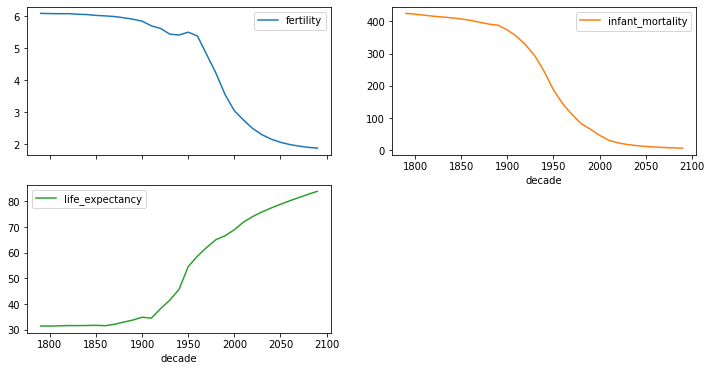

In [86]:
g.drop('year', axis=1).groupby('decade').mean().plot(subplots=True,layout=(2,2), figsize=(12,6))                   

# multilevel groupby

<AxesSubplot:xlabel='decade'>

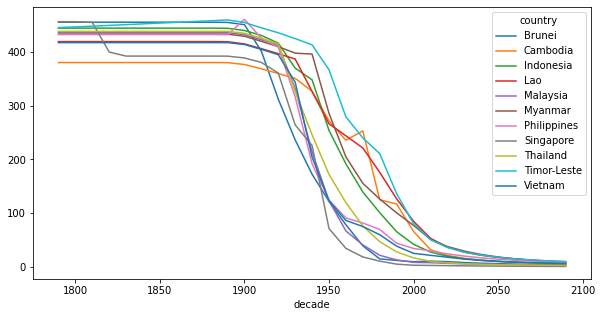

In [97]:
sea = g[g.country.isin(south_east_asia)].drop('year', axis=1)

sea.groupby(['decade', 'country'])['infant_mortality'].mean().unstack().plot(figsize=(10,5))


<AxesSubplot:xlabel='decade'>

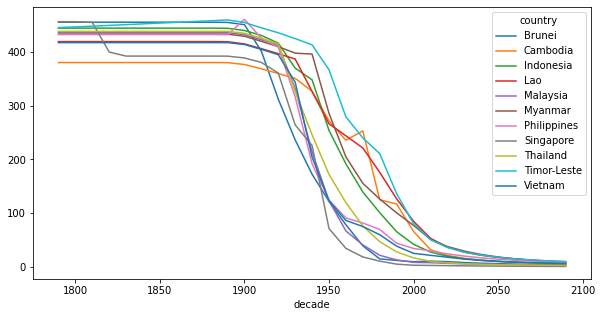

In [98]:
sea.pivot_table(index='decade', columns = 'country',values = 'infant_mortality' ,aggfunc=np.mean).plot(figsize=(10,5))

In [99]:
sea.groupby(['decade', 'country']).mean().unstack()

fertility                                                         \
country    Brunei Cambodia Indonesia    Lao Malaysia Myanmar Philippines   
decade                                                                     
1790        7.060    6.950     6.070  6.130    5.450   6.030       6.450   
1800        7.060    6.950     6.070  6.130    5.450   6.030       6.224   
1810        7.060    6.950     6.070  6.130    5.450   6.030       6.412   
1820        7.060    6.950     6.070  6.130    5.450   6.030       7.019   
1830        7.060    6.950     6.070  6.130    5.450   6.030       6.308   
1840        7.060    6.950     6.070  6.130    5.450   6.030       6.060   
1850        7.060    6.950     6.070  6.130    5.450   6.030       6.427   
1860        7.060    6.950     6.070  6.130    5.450   6.030       6.434   
1870        7.060    6.950     6.070  6.130    5.450   6.030       6.203   
1880        7.060    6.950     6.070  6.130    5.450   6.030       6.494   
1890        7.060    6.950     6.064  6.130    5.450   6.030       6.410   
1900        7.060    6.950     6.097  6.130    5.450   6.030       5.680   
1910        7.060    6.950     5.697  6.130    5.450   6.030       5.912   
1920        7.087    6.950     5.456  6.118    5.169   6.030       5.975   
1930        7.252    6.950     5.411  6.049    5.163   6.030       5.652   
1940        7.435    6.950     5.366  5.973    5.290   6.030       6.166   
1950        6.678    6.956     5.591  5.950    6.354   6.007       7.125   
1960        6.054    6.791     5.590  5.969    5.782   6.087       6.712   
1970        5.149    5.835     4.960  6.101    4.419   5.403       5.665   
1980        3.792    6.083     3.692  6.305    3.787   4.141       4.683   
1990        2.843    4.603     2.702  5.238    3.220   3.062       4.004   
2000        1.894    3.222     2.505  3.597    2.327   2.675       3.464   
2010        1.862    2.596     2.373  2.748    2.047   2.231       2.949   
2020        1.781    2.314     2.154  2.288    1.891   2.029       2.658   
2030        1.730    2.122     2.008  2.011    1.795   1.894       2.430   
2040        1.711    1.981     1.912  1.840    1.749   1.813       2.246   
2050        1.718    1.888     1.857  1.756    1.740   1.778       2.094   
2060        1.732    1.830     1.831  1.731    1.741   1.770       1.977   
2070        1.750    1.798     1.820  1.737    1.752   1.770       1.901   
2080        1.765    1.786     1.820  1.752    1.765   1.780       1.852   
2090        1.778    1.780     1.820  1.766    1.776   1.788       1.825   

                                        ... life_expectancy                   \
country Singapore Thailand Timor-Leste  ...        Cambodia Indonesia    Lao   
decade                                  ...                                    
1790        5.470    6.350       6.520  ...           35.00     30.00  31.90   
1800        5.450    6.350       6.520  ...           35.00     30.00  31.90   
1810        5.414    6.350       6.520  ...           35.00     30.00  31.90   
1820        5.376    6.350       6.520  ...           35.00     30.00  31.90   
1830        5.340    6.350       6.520  ...           35.00     30.00  31.90   
1840        5.304    6.350       6.520  ...           35.00     30.00  31.90   
1850        5.266    6.350       6.520  ...           35.00     30.00  31.90   
1860        5.230    6.350       6.520  ...           35.00     30.00  31.90   
1870        5.194    6.350       6.520  ...           35.39     30.00  31.83   
1880        5.444    6.350       6.520  ...           36.10     30.00  31.66   
1890        5.594    6.350       6.520  ...           36.79     30.00  31.54   
1900        5.423    6.350       6.520  ...           37.51     30.00  31.38   
1910        5.525    6.350       6.520  ...           36.84     28.40  30.13   
1920        6.203    6.337       6.520  ...           38.92     30.30  31.10   
1930        7.275    6.259       6.516  ...           39.52    

<AxesSubplot:xlabel='year'>

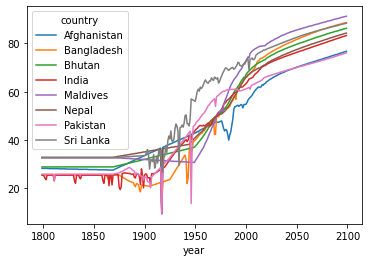

In [106]:
# population summary for a populous region

sa = g[g.country.isin(south_asia)]
sa.groupby(['country', 'year'])['life_expectancy'].mean().unstack('country').plot()

In [107]:
g.isna().sum()

country                0
year                   0
fertility             87
infant_mortality    4966
population          4816
life_expectancy     4816
decade                 0
dtype: int64

In [128]:
infant = g.groupby('country').filter(lambda x: x['infant_mortality'].mean() > 10.0)

In [129]:
infant

,country,year,fertility,infant_mortality,population,life_expectancy,decade
0,Afghanistan,1799,7.00,469.0,3.28M,28.2,1790
1,Afghanistan,1800,7.00,469.0,3.28M,28.2,1800
2,Afghanistan,1801,7.00,469.0,3.28M,28.2,1800
3,Afghanistan,1802,7.00,469.0,3.28M,28.2,1800
4,Afghanistan,1803,7.00,469.0,3.28M,28.2,1800
...,...,...,...,...,...,...,...
60797,Zimbabwe,2095,1.84,14.1,30.9M,73.9,2090
60798,Zimbabwe,2096,1.83,13.9,31M,74.0,2090
60799,Zimbabwe,2097,1.83,13.8,31M,74.2,2090
60800,Zimbabwe,2098,1.83,13.7,31M,74.3,2090


<AxesSubplot:xlabel='year'>

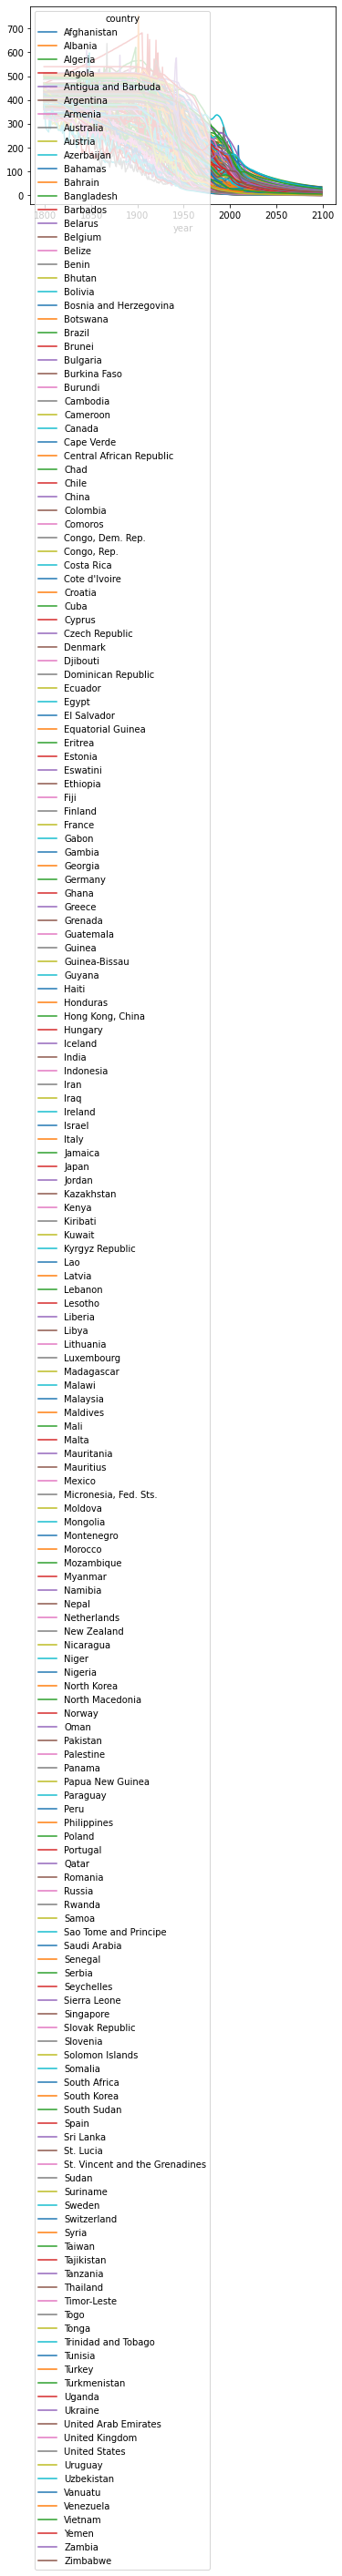

In [130]:
infant.groupby(['country', 'year'])['infant_mortality'].mean().unstack('country').plot()

In [131]:
g.set_index(['country','year'], inplace = True)
g

fertility  infant_mortality population  life_expectancy  \
country     year                                                            
Afghanistan 1799       7.00             469.0      3.28M             28.2   
            1800       7.00             469.0      3.28M             28.2   
            1801       7.00             469.0      3.28M             28.2   
            1802       7.00             469.0      3.28M             28.2   
            1803       7.00             469.0      3.28M             28.2   
...                     ...               ...        ...              ...   
Zimbabwe    2095       1.84              14.1      30.9M             73.9   
            2096       1.83              13.9        31M             74.0   
            2097       1.83              13.8        31M             74.2   
            2098       1.83              13.7        31M             74.3   
            2099       1.83              13.7        31M             74.4   

                  decade  
country     year          
Afghanistan 1799    1790  
            1800    1800  
            1801    1800  
            1802    1800  
            1803    1800  
...                  ...  
Zimbabwe    2095    2090  
            2096    2090  
            2097    2090  
            2098    2090  
            2099    2090  

[60802 rows x 5 columns]

In [133]:
g.groupby(level=[0,1]).mean()

fertility  infant_mortality  life_expectancy  decade
country     year                                                      
Afghanistan 1799       7.00             469.0             28.2  1790.0
            1800       7.00             469.0             28.2  1800.0
            1801       7.00             469.0             28.2  1800.0
            1802       7.00             469.0             28.2  1800.0
            1803       7.00             469.0             28.2  1800.0
...                     ...               ...              ...     ...
Zimbabwe    2095       1.84              14.1             73.9  2090.0
            2096       1.83              13.9             74.0  2090.0
            2097       1.83              13.8             74.2  2090.0
            2098       1.83              13.7             74.3  2090.0
            2099       1.83              13.7             74.4  2090.0

[60802 rows x 4 columns]